In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzAx'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

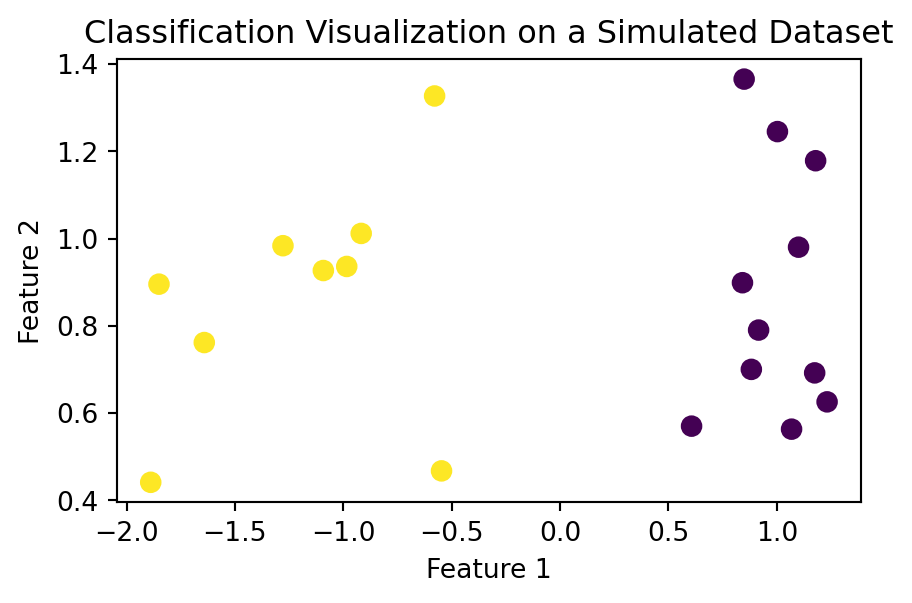

In [2]:
#| echo: false
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generating a simulated dataset for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Applying a classification model (Support Vector Machine)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Plotting the classification result
plt.figure(figsize=(5, 3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title("Classification Visualization on a Simulated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
#| echo: false
from sklearn.datasets import make_classification
import pandas as pd

# Simulating a dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, 
                           n_classes=2, random_state=42)

# Creating a DataFrame
df = pd.DataFrame(X, columns=['Budget', 'Duration', 'Channel', 'Target_Audience_Size'])
df['Channel'] = df['Channel'].apply(lambda x: round(abs(x) % 4))  # Converting to categorical channel
df['Season'] = df['Duration'].apply(lambda x: round(abs(x) % 4))  # Adding a 'Season' column
df['Campaign_Success'] = y

df.head(5)

,Budget,Duration,Channel,Target_Audience_Size,Season,Campaign_Success
0,1.170199,-1.110199,1,-0.910081,1,0
1,0.198680,1.499221,0,0.988123,1,1
2,1.695723,0.126734,0,0.222349,0,1
3,-0.531455,-0.169270,1,-2.224787,0,0
4,0.194052,-2.479343,0,1.518522,2,0


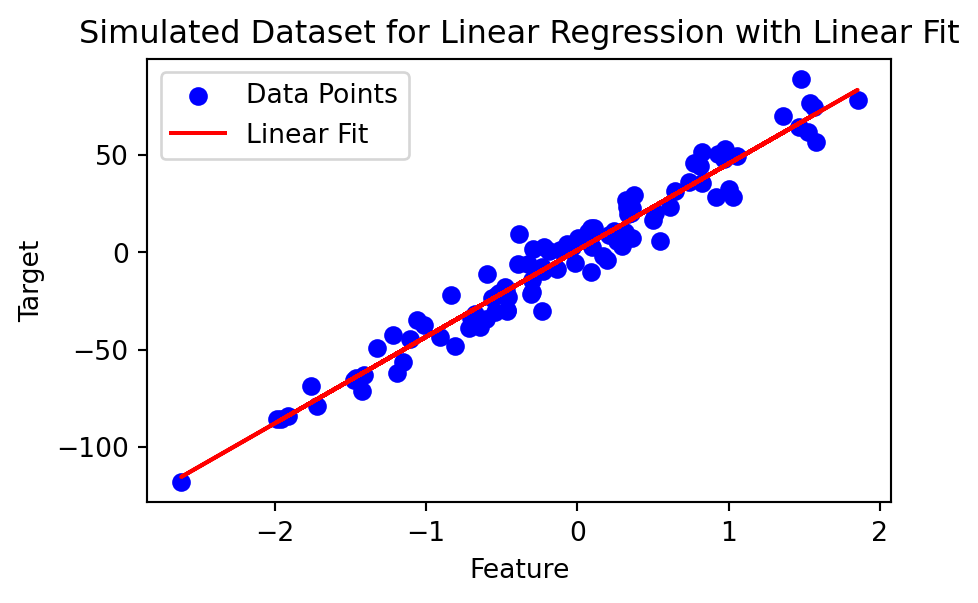

,Feature,Target
0,0.931280,50.779929
1,0.087047,-10.065270
2,-1.057711,-34.918392
3,0.314247,10.526743
4,-0.479174,-17.738377


In [4]:
#| echo: false
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generating a simulated dataset for linear regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fitting a linear regression model to the data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the dataset with the linear fit
plt.figure(figsize=(5, 3))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Fit')
plt.title("Simulated Dataset for Linear Regression with Linear Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

# Converting the regression data into a DataFrame
regression_df = pd.DataFrame({'Feature': X.flatten(), 'Target': y})

# Displaying the first few rows of the DataFrame
regression_df.head()

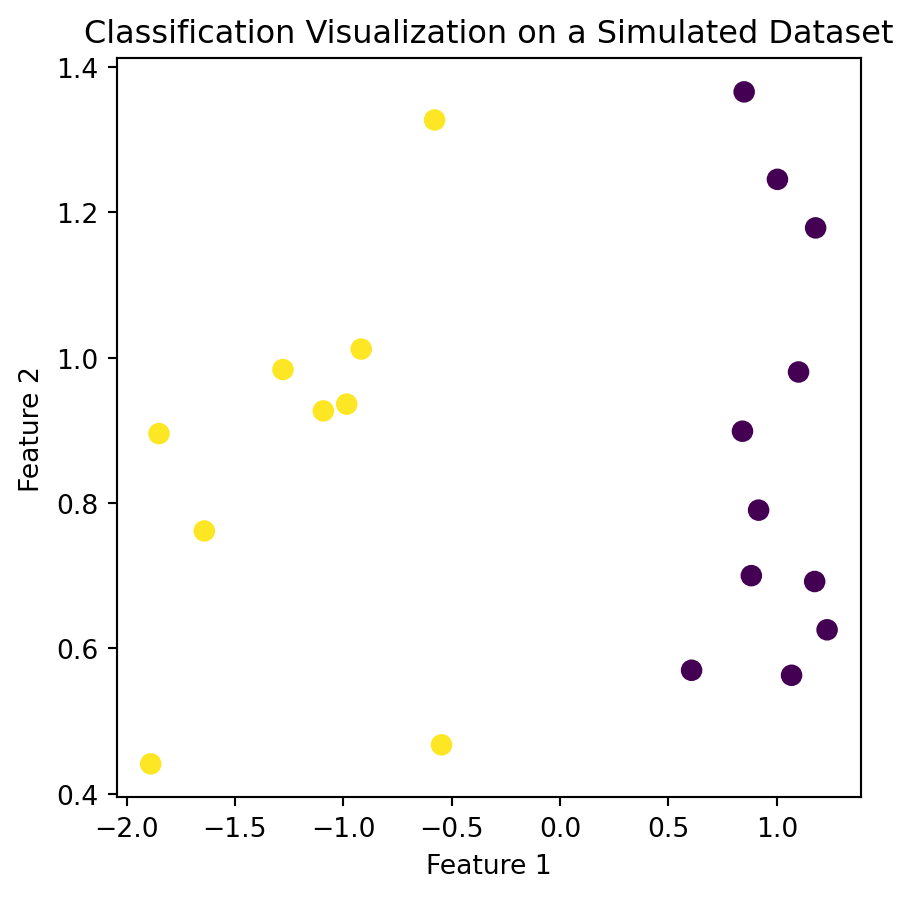

In [5]:
#| echo: false
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generating a simulated dataset for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Applying a classification model (Support Vector Machine)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Plotting the classification result
plt.figure(figsize=(5, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title("Classification Visualization on a Simulated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
#| echo: false
from sklearn.datasets import make_classification
import pandas as pd

# Simulating a dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=3, n_redundant=0, 
                           n_classes=2, random_state=42)

# Creating a DataFrame
df = pd.DataFrame(X, columns=['Budget', 'Duration', 'Channel', 'Target_Audience_Size'])
df['Channel'] = df['Channel'].apply(lambda x: round(abs(x) % 4))  # Converting to categorical channel
df['Season'] = df['Duration'].apply(lambda x: round(abs(x) % 4))  # Adding a 'Season' column
df['Campaign_Success'] = y

df.head(10)

,Budget,Duration,Channel,Target_Audience_Size,Season,Campaign_Success
0,1.170199,-1.110199,1,-0.910081,1,0
1,0.198680,1.499221,0,0.988123,1,1
2,1.695723,0.126734,0,0.222349,0,1
3,-0.531455,-0.169270,1,-2.224787,0,0
4,0.194052,-2.479343,0,1.518522,2,0
5,1.807197,1.341938,1,-0.667830,1,1
6,-0.093387,-2.407374,0,-0.480568,2,0
7,1.063941,0.864310,1,-0.957300,1,1
8,-1.433152,1.360601,1,1.384636,1,1
9,-0.937926,0.464292,1,-2.113015,0,1


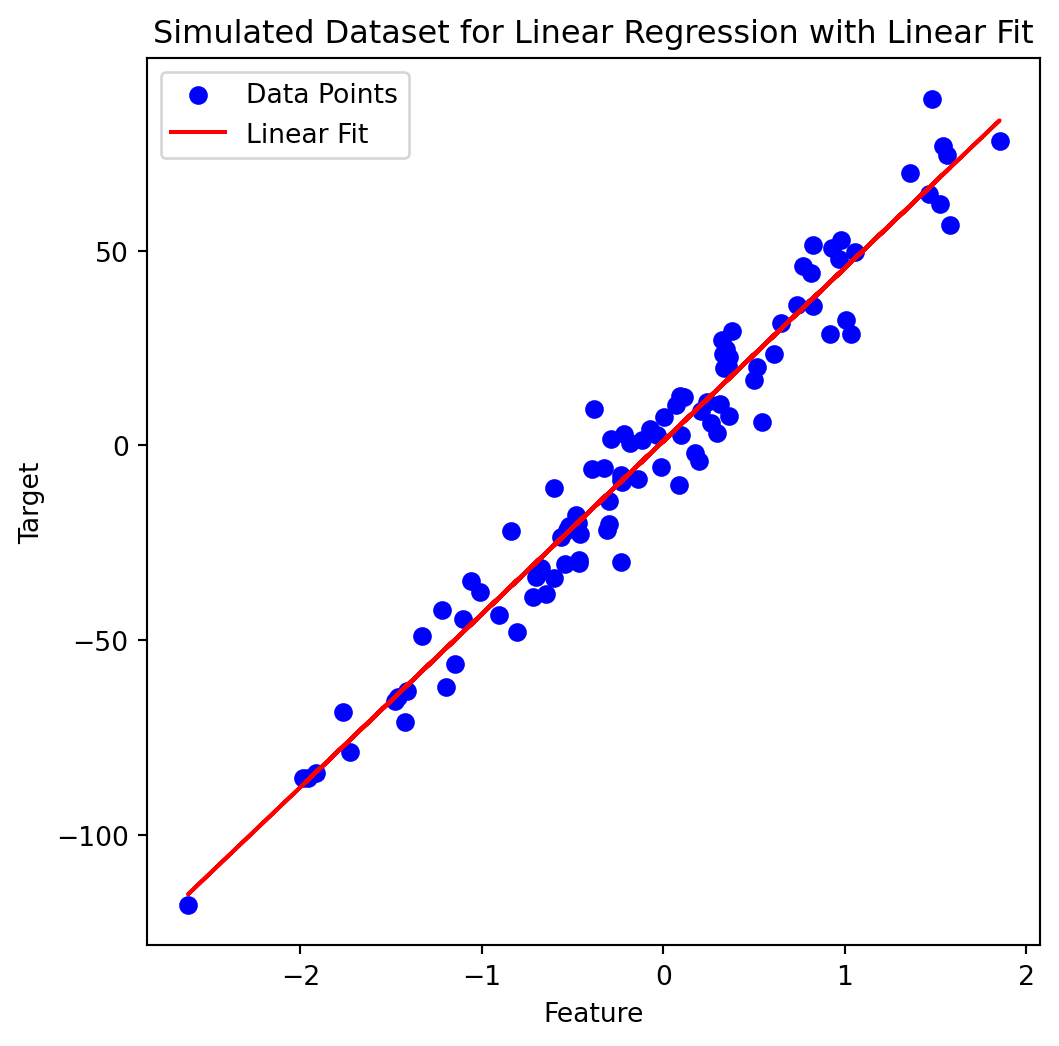

In [7]:
#| echo: false
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generating a simulated dataset for linear regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fitting a linear regression model to the data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the dataset with the linear fit
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Fit')
plt.title("Simulated Dataset for Linear Regression with Linear Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [8]:
#| echo: false
# Converting the regression data into a DataFrame
regression_df = pd.DataFrame({'Feature': X.flatten(), 'Target': y})

# Displaying the first few rows of the DataFrame
regression_df.head(10)

,Feature,Target
0,0.931280,50.779929
1,0.087047,-10.065270
2,-1.057711,-34.918392
3,0.314247,10.526743
4,-0.479174,-17.738377
5,0.647689,31.564596
6,-0.463418,-30.068883
7,0.542560,5.912007
8,0.611676,23.473374
9,1.003533,32.343595


In [9]:
#| echo: false
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Simulating a dataset
transactions = [
    ["Bread", "Milk"],
    ["Bread", "Diapers", "Beer", "Eggs"],
    ["Milk", "Diapers", "Beer", "Cola"],
    ["Bread", "Milk", "Diapers", "Beer"],
    ["Bread", "Milk", "Diapers", "Cola"],
]

# Instantiating the encoder and transforming the dataset
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Applying the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Displaying the association rules
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0   (Diapers)      (Beer)                 0.8                 0.6      0.6   
1      (Beer)   (Diapers)                 0.6                 0.8      0.6   
2   (Diapers)     (Bread)                 0.8                 0.8      0.6   
3     (Bread)   (Diapers)                 0.8                 0.8      0.6   
4      (Milk)     (Bread)                 0.8                 0.8      0.6   
5     (Bread)      (Milk)                 0.8                 0.8      0.6   
6      (Milk)   (Diapers)                 0.8                 0.8      0.6   
7   (Diapers)      (Milk)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  1.2500               1.0      0.12         1.6           1.00   
1        1.00  1.2500               1.0      0.12         inf           0.50   
2        0.75  0.9375               1.0     -0.04        

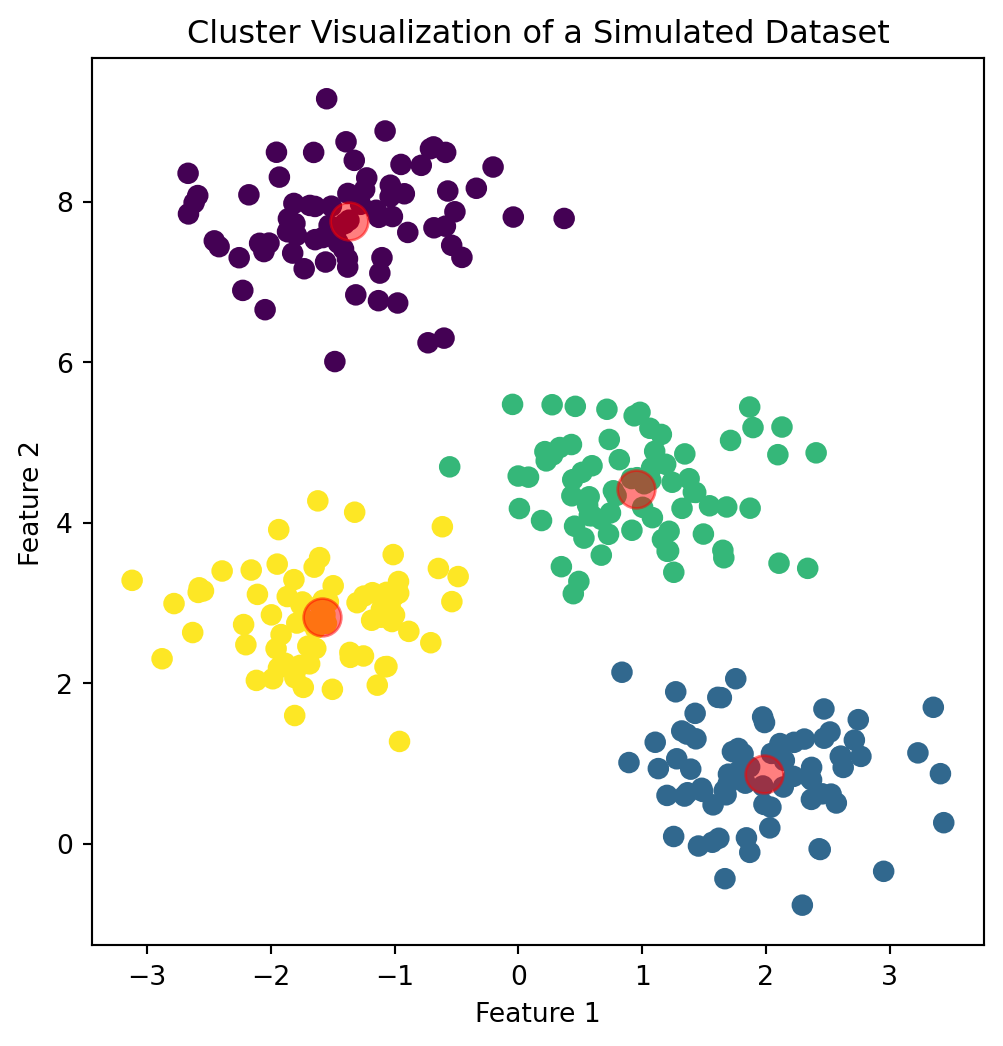

In [10]:
#| echo: false
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generating a simulated dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("Cluster Visualization of a Simulated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

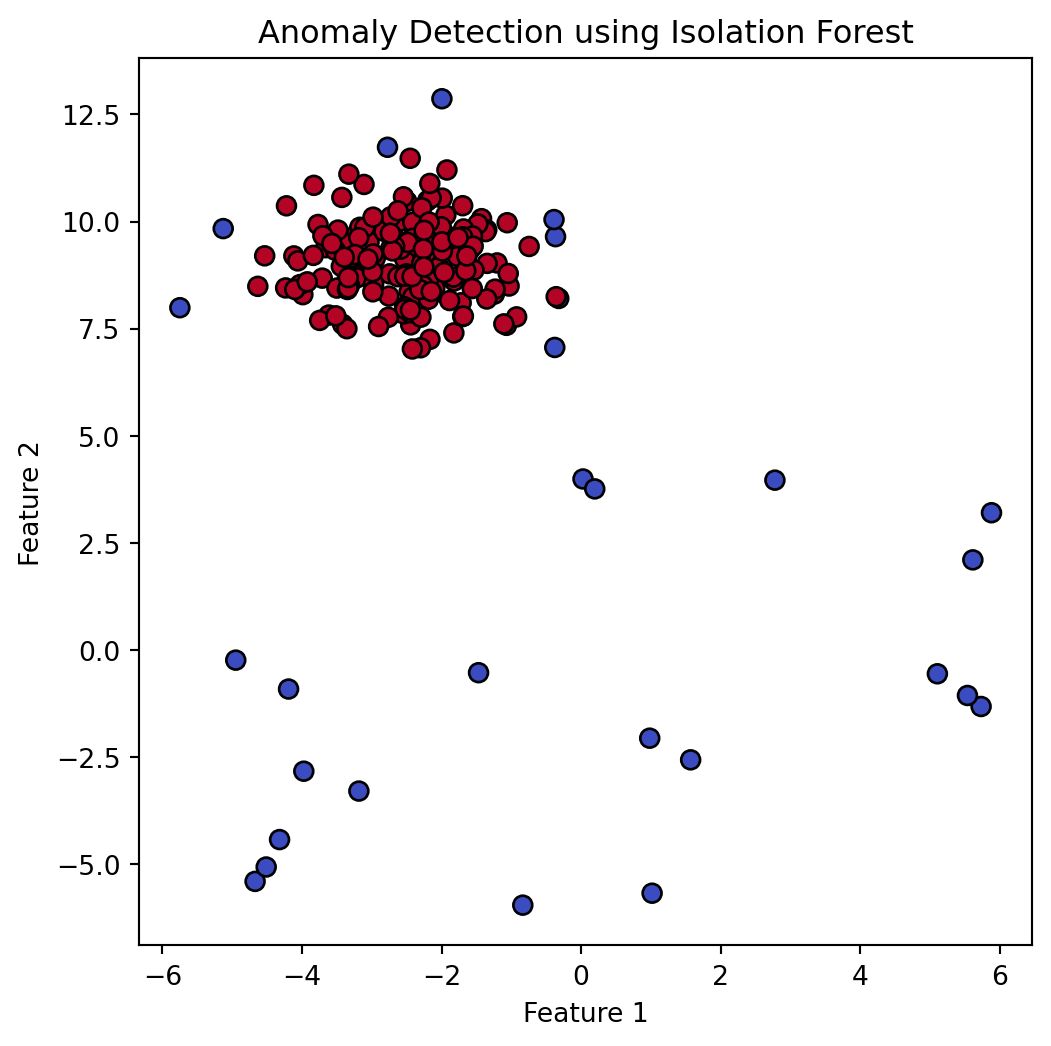

In [11]:
#| echo: false

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

# Generating a dataset with outliers
X, _ = make_blobs(n_samples=200, centers=1, cluster_std=1, random_state=42)
X[-20:] = np.random.uniform(low=-6, high=6, size=(20, 2))  # Adding outliers

# Applying Isolation Forest for anomaly detection
clf = IsolationForest(random_state=42)
pred = clf.fit_predict(X)

# Plotting the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
import numpy as np

# Creating a simple NumPy array
arr = np.array([1, 2, 3, 4])

# Multidimensional array
multi_arr = np.array([[1, 2, 3], [4, 5, 6]])

# Range of values
range_arr = np.arange(10)

# Array of zeros
zeros_arr = np.zeros((3, 3))

# Array of ones
ones_arr = np.ones((2, 2))

# Identity matrix
identity_matrix = np.eye(3)

In [13]:
#| echo: false
print("arr:", arr, "\n")

print("multi_arr:", multi_arr, "\n")

print("range_arr:", range_arr, "\n")

print("zeros_arr:", zeros_arr, "\n")

print("ones_arr:", ones_arr, "\n")

print("identity_matrix:", identity_matrix)

arr: [1 2 3 4] 

multi_arr: [[1 2 3]
 [4 5 6]] 

range_arr: [0 1 2 3 4 5 6 7 8 9] 

zeros_arr: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

ones_arr: [[1. 1.]
 [1. 1.]] 

identity_matrix: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [14]:
# Array dimensions
print("Dimensions:", multi_arr.ndim)

# Shape of array
print("Shape:", multi_arr.shape)

# Size of array
print("Size:", multi_arr.size)

# Data type of array elements
print("Data Type:", multi_arr.dtype)

Dimensions: 2
Shape: (2, 3)
Size: 6
Data Type: int64


In [15]:
# Element-wise addition
addition = arr + 2

# Element-wise subtraction
subtraction = arr - 2

# Element-wise multiplication
multiplication = arr * 2

# Element-wise division
division = arr / 2

In [16]:
#| echo: false

print("addition:", addition, "\n")

print("subtraction:", subtraction, "\n")

print("multiplication:", multiplication, "\n")

print("division:", division, "\n")

addition: [3 4 5 6] 

subtraction: [-1  0  1  2] 

multiplication: [2 4 6 8] 

division: [0.5 1.  1.5 2. ] 



In [17]:
print(addition)
print(subtraction)
print(multiplication)
print(division)

[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[0.5 1.  1.5 2. ]


In [18]:
print("addition:", addition, "\n")

print("subtraction:", subtraction, "\n")

print("multiplication:", multiplication, "\n")

print("division:", division, "\n")

addition: [3 4 5 6] 

subtraction: [-1  0  1  2] 

multiplication: [2 4 6 8] 

division: [0.5 1.  1.5 2. ] 



In [19]:
# Sum of elements
total = arr.sum()

# Mean of elements
mean_value = arr.mean()

# Standard deviation
std_dev = arr.std()

# Correlation coefficient
corr = np.corrcoef(multi_arr)

In [20]:
#| echo: false
print("total:", total, "\n")

print("mean_value:", mean_value, "\n")

print("std_dev:", std_dev, "\n")

print("corr:", corr, "\n")

total: 10 

mean_value: 2.5 

std_dev: 1.118033988749895 

corr: [[1. 1.]
 [1. 1.]] 



In [21]:
# Reshaping an array
reshaped = np.reshape(range_arr, (2, 5))

# Transpose of an array
transposed = multi_arr.T

In [22]:
#| echo: false

print("range_arr:", range_arr, "\n")

print("reshaped:", reshaped, "\n")

print("multi_arr:", multi_arr, "\n")

print("transposed:", transposed, "\n")

range_arr: [0 1 2 3 4 5 6 7 8 9] 

reshaped: [[0 1 2 3 4]
 [5 6 7 8 9]] 

multi_arr: [[1 2 3]
 [4 5 6]] 

transposed: [[1 4]
 [2 5]
 [3 6]] 



In [23]:
# Accessing a specific element
element = multi_arr[0, 1]

# Slicing a row
row = multi_arr[1, :]

# Slicing a column
column = multi_arr[:, 2]

In [24]:
#| echo: false

print("multi_arr:", multi_arr, "\n")

print("row:", row, "\n")

print("column:", column, "\n")

multi_arr: [[1 2 3]
 [4 5 6]] 

row: [4 5 6] 

column: [3 6] 



In [25]:
# Broadcasting allows arithmetic operations on arrays of different sizes
broadcasted_addition = multi_arr + np.array([1, 0, 1])

In [26]:
#| echo: false

print("multi_arr:", multi_arr, "\n")

print("broadcasted_addition:", broadcasted_addition, "\n")

multi_arr: [[1 2 3]
 [4 5 6]] 

broadcasted_addition: [[2 2 4]
 [5 5 7]] 



In [27]:
# Dot product
dot_product = np.dot(arr, arr)

# Matrix multiplication
matrix_mul = np.dot(multi_arr, identity_matrix)

In [28]:
#| echo: false

print("dot_product:", dot_product, "\n")

print("matrix_mul:", matrix_mul, "\n")

dot_product: 30 

matrix_mul: [[1. 2. 3.]
 [4. 5. 6.]] 



In [29]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(identity_matrix)

In [30]:
#| echo: false

print("eigenvalues:", eigenvalues, "\n")

print("eigenvectors:", eigenvectors, "\n")

eigenvalues: [1. 1. 1.] 

eigenvectors: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

